In [28]:
#Nama=Dervio Rahmatdianto
import pandas as pd
import re


In [29]:
#Rumusan Masalah
# Load dataset
df = pd.read_csv('datasetdana.csv')
df

,userName,score,at,content,sentimen
0,Elisya Kasni,5,2024-02-15 11:24:56,Bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,Dana mmg keren mantap.,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,Saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,Kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,Saldo hilang karena no lama Hilang ganti no sa...,NEGATIVE
...,...,...,...,...,...
49995,Marha Marha,5,2023-12-31 16:34:55,Bagus,POSITIVE
49996,Unique Laudy,1,2023-12-31 16:33:47,"error, tidak bisa masuk",NEGATIVE
49997,supendi supendi,5,2023-12-31 16:30:08,Cukup membantu,POSITIVE
49998,hasansend farm,1,2023-12-31 16:28:51,"tolong pihak dana knp saldo saya hilang,ada yg...",NEUTRAL


In [30]:
#Pra-Pemrosesan Data
df.shape


(50000, 5)

In [31]:
df.duplicated().sum()


0

In [32]:
df.isnull().sum()


userName    0
score       0
at          0
content     0
sentimen    0
dtype: int64

In [33]:
def clean_twitter_text(text):
    # Menghapus mention (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Menghapus retweet marker (RT)
    text = re.sub(r'RT[\s]+', '', text)
    # Menghapus URL
    text = re.sub(r'https?:\/\/\S+', '', text)
    # Menghapus karakter alfanumerik
    text = re.sub(r'[^\w\s]', '', text)
    # Menggabungkan multiple spasi menjadi satu
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['content'] = df['content'].apply(clean_twitter_text)



In [34]:
df['content'] = df['content'].str.lower()
df


,userName,score,at,content,sentimen
0,Elisya Kasni,5,2024-02-15 11:24:56,bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,dana mmg keren mantap,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,saldo hilang karena no lama hilang ganti no sa...,NEGATIVE
...,...,...,...,...,...
49995,Marha Marha,5,2023-12-31 16:34:55,bagus,POSITIVE
49996,Unique Laudy,1,2023-12-31 16:33:47,error tidak bisa masuk,NEGATIVE
49997,supendi supendi,5,2023-12-31 16:30:08,cukup membantu,POSITIVE
49998,hasansend farm,1,2023-12-31 16:28:51,tolong pihak dana knp saldo saya hilangada yg ...,NEUTRAL


In [37]:
# Normalization
norm = {
    " yg ": " yang ",
    " mmg ": "memang",
    "knp": "kenapa",
    " nggak ": " tidak ",
    " gak ": " tidak ",
    " bangetdari ": " banget dari ",
    " vibes ": " suasana ",
    " m ": " "
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

# Applying normalization to a DataFrame column
df['content'] = df['content'].apply(lambda x: normalisasi(x))
df


,userName,score,at,content,sentimen
0,Elisya Kasni,5,2024-02-15 11:24:56,bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,danamemangkeren mantap,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,ngajuin upgrade dana premium krna ktp buram jd...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,saldo hilang no lama hilang ganti no saldonya ...,NEGATIVE
...,...,...,...,...,...
49995,Marha Marha,5,2023-12-31 16:34:55,bagus,POSITIVE
49996,Unique Laudy,1,2023-12-31 16:33:47,error bisa masuk,NEGATIVE
49997,supendi supendi,5,2023-12-31 16:30:08,cukup membantu,POSITIVE
49998,hasansend farm,1,2023-12-31 16:28:51,pihak dana saldo hilangada bobol akun sayagk m...,NEUTRAL


In [38]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Daftar kata-kata stop tambahan
more_stop_words = ["tidak"]
# Menggabungkan stop words bawaan dengan stop words tambahan
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)
# Membuat objek ArrayDictionary
new_array = ArrayDictionary(stop_words)
# Membuat objek StopWordRemover dengan konfigurasi stop words tambahan
stopword_remover = StopWordRemover(new_array)
# Fungsi untuk menghapus stop words
def remove_stopwords(text):
    # Menghapus stop words dari teks
    return stopword_remover.remove(text)
# Menggunakan fungsi remove_stopwords pada kolom 'content'
df['content'] = df['content'].apply(remove_stopwords)
df


,userName,score,at,content,sentimen
0,Elisya Kasni,5,2024-02-15 11:24:56,bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,danamemangkeren mantap,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,ngajuin upgrade dana premium krna ktp buram jd...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,saldo hilang no lama hilang ganti no saldonya ...,NEGATIVE
...,...,...,...,...,...
49995,Marha Marha,5,2023-12-31 16:34:55,bagus,POSITIVE
49996,Unique Laudy,1,2023-12-31 16:33:47,error masuk,NEGATIVE
49997,supendi supendi,5,2023-12-31 16:30:08,cukup membantu,POSITIVE
49998,hasansend farm,1,2023-12-31 16:28:51,pihak dana saldo hilangada bobol akun sayagk m...,NEUTRAL


In [39]:
#Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized


0                                                  [bagus]
1                                [danamemangkeren, mantap]
2        [ngajuin, upgrade, dana, premium, krna, ktp, b...
3        [kocak, mana, diskon, nya, ml, malah, eror, se...
4        [saldo, hilang, no, lama, hilang, ganti, no, s...
                               ...                        
49995                                              [bagus]
49996                                       [error, masuk]
49997                                    [cukup, membantu]
49998    [pihak, dana, saldo, hilangada, bobol, akun, s...
49999                                               [good]
Name: content, Length: 50000, dtype: object

In [40]:
# Menghitung jumlah data dengan label positif, negatif, dan netral
positif_count = (df['sentimen'] == 'POSITIVE').sum()
negatif_count = (df['sentimen'] == 'NEGATIVE').sum()
netral_count = (df['sentimen'] == 'NEUTRAL').sum()
# Menampilkan hasil
print("Jumlah Data dengan Label Positif:", positif_count)
print("Jumlah Data dengan Label Negatif:", negatif_count)
print("Jumlah Data dengan Label Netral:", netral_count)


Jumlah Data dengan Label Positif: 26555
Jumlah Data dengan Label Negatif: 17073
Jumlah Data dengan Label Netral: 6372


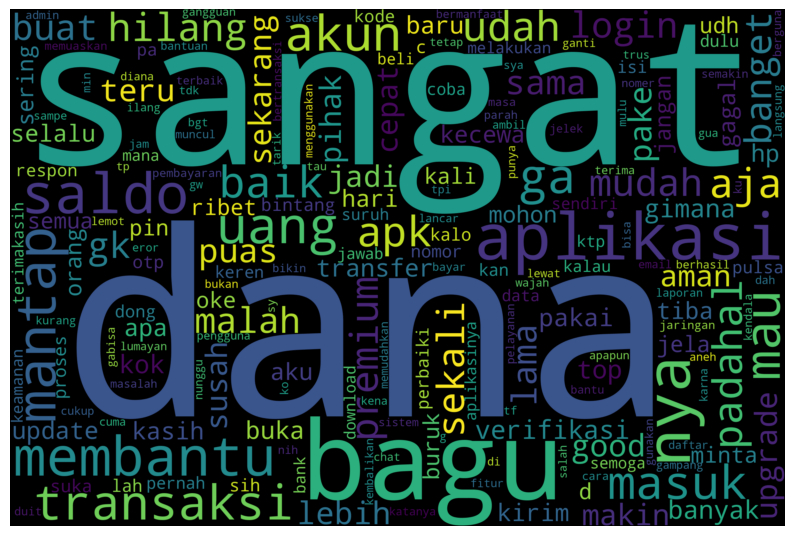

In [41]:
#Menampilkan kata kata yang sering muncul
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
all_words = ' '.join([tweets for tweets in df['content']])
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',  
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)
plot_cloud(wordcloud)  


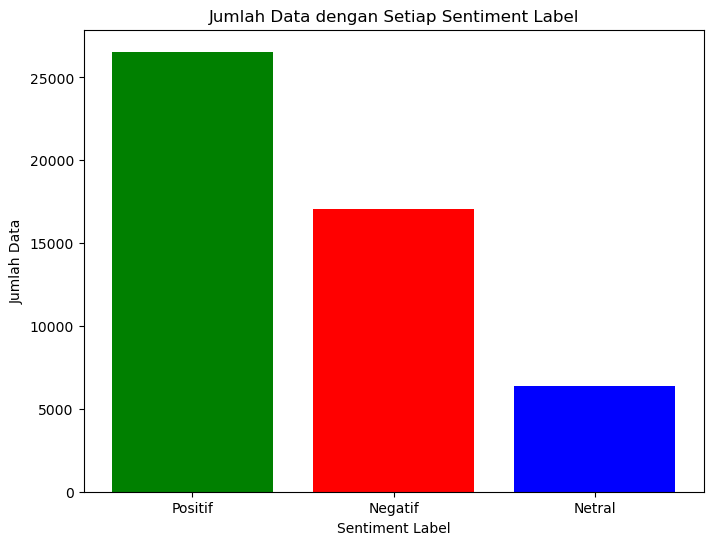

In [42]:
# Data jumlah data dengan masing-masing label
labels = ['Positif', 'Negatif', 'Netral']
counts = [positif_count, negatif_count, netral_count]
# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red', 'blue'])
# Menambahkan label pada sumbu-sumbu
plt.xlabel('Sentiment Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data dengan Setiap Sentiment Label')
# Menampilkan bar chart
plt.show()


In [43]:
df


,userName,score,at,content,sentimen
0,Elisya Kasni,5,2024-02-15 11:24:56,bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,danamemangkeren mantap,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,ngajuin upgrade dana premium krna ktp buram jd...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,saldo hilang no lama hilang ganti no saldonya ...,NEGATIVE
...,...,...,...,...,...
49995,Marha Marha,5,2023-12-31 16:34:55,bagus,POSITIVE
49996,Unique Laudy,1,2023-12-31 16:33:47,error masuk,NEGATIVE
49997,supendi supendi,5,2023-12-31 16:30:08,cukup membantu,POSITIVE
49998,hasansend farm,1,2023-12-31 16:28:51,pihak dana saldo hilangada bobol akun sayagk m...,NEUTRAL


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentimen'], test_size=0.2, random_state=42)


In [45]:
# Ekstraksi fitur menggunakan Bag-of-Words (BoW)
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [46]:
# Inisialisasi dan pelatihan model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

# Prediksi pada set pengujian
y_pred = nb_model.predict(X_test_bow)

In [47]:
# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.7798
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.71      0.73      0.72      3403
     NEUTRAL       0.76      0.17      0.28      1307
    POSITIVE       0.82      0.96      0.88      5290

    accuracy                           0.78     10000
   macro avg       0.76      0.62      0.63     10000
weighted avg       0.77      0.78      0.75     10000

